In [2]:
from bead_motility3 import *

In [3]:
egfp_n_wasp_pwwca_folder_path = '/home/jiongyi/Documents/lab_data/2020_08_28/4_uM_profilin_1pct_hl555_actin_00_nM_arp23_00_nM_cp/300_nM_egfp_n_wasp_pwwca'
egfp_n_wasp_pwca_folder_path = '/home/jiongyi/Documents/lab_data/2020_08_28/4_uM_profilin_1pct_hl555_actin_00_nM_arp23_00_nM_cp/300_nM_egfp_n_wasp_pwca'

egfp_n_wasp_pwwca_props_mat = batch_analysis(egfp_n_wasp_pwwca_folder_path)
egfp_n_wasp_pwca_props_mat = batch_analysis(egfp_n_wasp_pwca_folder_path)

/home/jiongyi/github/jupyter/actin_assembly/bead_motility/bead_motility3.py:63: UserWarning: /home/jiongyi/Documents/lab_data/2020_08_28/4_uM_profilin_1pct_hl555_actin_00_nM_arp23_00_nM_cp/300_nM_egfp_n_wasp_pwwca/egfp_hl555_widefield_11/Pos0/img_000000000_filtered 470 GFP epi_000_npf_segmentation.tif is a low contrast image
  imsave(file_path_str[:-4] + '_npf_segmentation.tif', img_as_uint(rgb_im))
/home/jiongyi/github/jupyter/actin_assembly/bead_motility/bead_motility3.py:63: UserWarning: /home/jiongyi/Documents/lab_data/2020_08_28/4_uM_profilin_1pct_hl555_actin_00_nM_arp23_00_nM_cp/300_nM_egfp_n_wasp_pwwca/egfp_hl555_widefield_9/Pos0/img_000000000_filtered 470 GFP epi_000_npf_segmentation.tif is a low contrast image
  imsave(file_path_str[:-4] + '_npf_segmentation.tif', img_as_uint(rgb_im))
/home/jiongyi/github/jupyter/actin_assembly/bead_motility/bead_motility3.py:63: UserWarning: /home/jiongyi/Documents/lab_data/2020_08_28/4_uM_profilin_1pct_hl555_actin_00_nM_arp23_00_nM_cp/300_nM

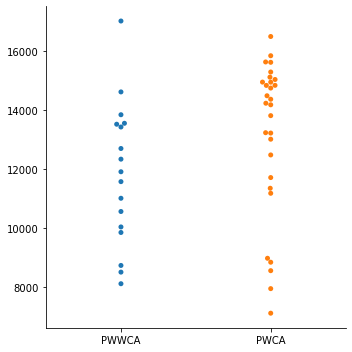

In [31]:
%matplotlib inline
from matplotlib.pyplot import subplots
import seaborn as sns
from pandas import DataFrame

egfp_intensity_dict = {'PWWCA': egfp_n_wasp_pwwca_props_mat[:, 0].flatten(), 'PWCA': egfp_n_wasp_pwca_props_mat[:, 0].flatten()}
egfp_intensity_df = DataFrame.from_dict(egfp_intensity_dict, orient = 'index')
catplot(data = egfp_intensity_df.transpose(), kind = 'swarm')

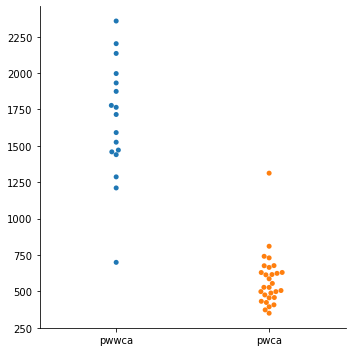

In [4]:
hl555_intensity_dict = {'pwwca': egfp_n_wasp_pwwca_props_mat[:, 1].flatten(), 'pwca': egfp_n_wasp_pwca_props_mat[:, 1].flatten()}
hl555_intensity_df = DataFrame.from_dict(hl555_intensity_dict, orient = 'index')
catplot(data = hl555_intensity_df.transpose(), kind = 'swarm')

Text(0, 0.5, 'Mean HL555 fluorescence itensity (AU)')

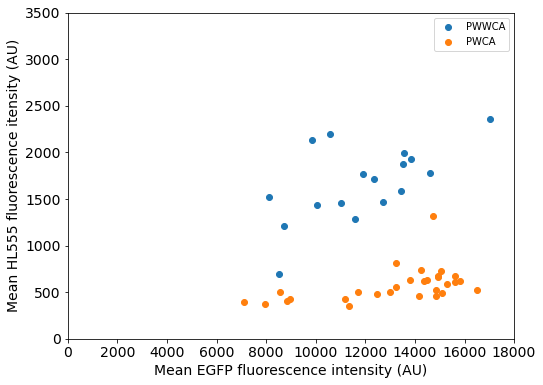

In [27]:
fig1_hand, axes1_hand = subplots()
fig1_hand.set_figheight(6)
fig1_hand.set_figwidth(8)
axes1_hand.scatter(egfp_n_wasp_pwwca_props_mat[:, 0], egfp_n_wasp_pwwca_props_mat[:, 1], label = 'PWWCA')
axes1_hand.scatter(egfp_n_wasp_pwca_props_mat[:, 0], egfp_n_wasp_pwca_props_mat[:, 1], label = 'PWCA')
axes1_hand.set_xlim([0, 18000])
axes1_hand.set_ylim([0, 3500])
axes1_hand.legend()
axes1_hand.tick_params(labelsize=14)
axes1_hand.set_xlabel('Mean EGFP fluorescence intensity (AU)', fontsize=14)
axes1_hand.set_ylabel('Mean HL555 fluorescence itensity (AU)', fontsize=14)

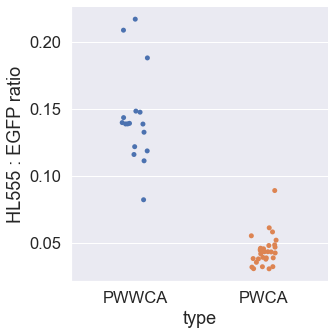

In [109]:
actin_egfp_pwwca_ratio_df = DataFrame(data = egfp_n_wasp_pwwca_props_mat[:, 1] / egfp_n_wasp_pwwca_props_mat[:, 0])
actin_egfp_pwwca_ratio_df['type'] = 'PWWCA'
actin_egfp_pwca_ratio_df = DataFrame(data = egfp_n_wasp_pwca_props_mat[:, 1] / egfp_n_wasp_pwca_props_mat[:, 0])
actin_egfp_pwca_ratio_df['type'] = 'PWCA'
actin_egfp_n_wasp_ratio_df = actin_egfp_pwwca_ratio_df.append(actin_egfp_pwca_ratio_df, ignore_index = True)
actin_egfp_n_wasp_ratio_df = actin_egfp_n_wasp_ratio_df.rename(columns={0: 'HL555 : EGFP ratio'})
sns.catplot(data = actin_egfp_n_wasp_ratio_df, y = actin_egfp_n_wasp_ratio_df.columns[0], x = "type")